In [12]:
import gym

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common import make_vec_env
from stable_baselines import A2C

from gym.utils import seeding
from stable_baselines.common.env_checker import check_env
import numpy as np

from ads_utils import load_data, plot, Environment
from tqdm import tqdm

In [17]:
INITIAL_BALANCE = 10_000
PAST_TICKS = 5
        
'''NOTE: there is no train/test split yet'''            
fake = np.linspace(100, 200, len(data))
data['close1'] = fake
fake = np.linspace(200, 100, len(data))
data['close2'] = fake
fake = 10*np.sin(np.linspace(0, 3141.592, len(data))/50) + 20
data['close3'] = fake
fake = 100*np.sin(np.linspace(0, 3141.592, len(data))/50) + np.random.normal(1000, 50, len(data))
data['close4'] = fake
fake = np.random.normal(1000, 50, len(data))
data['close5'] = fake
fake = 1000 - np.abs(np.arange(0, len(data)) - len(data)/2) * 0.05
data['close6'] = fake
fake = np.random.normal(1000, 50, len(data)) - np.abs(np.arange(0, len(data)) - len(data)/2) * 0.05
data['close7'] = fake

envs = []
for col in ['close'] + [f'close{i}' for i in range(1, 8)]:
    env = Environment(data[col].to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
    envs.append(env)

In [20]:
# Something to look into as some environments don't seem to be satisfactory
for i in range(8):
    try:
        check_env(envs[i])
    except:
        print(i)

0
2
4
5
7


  0%|          | 0/8 [00:00<?, ?it/s]

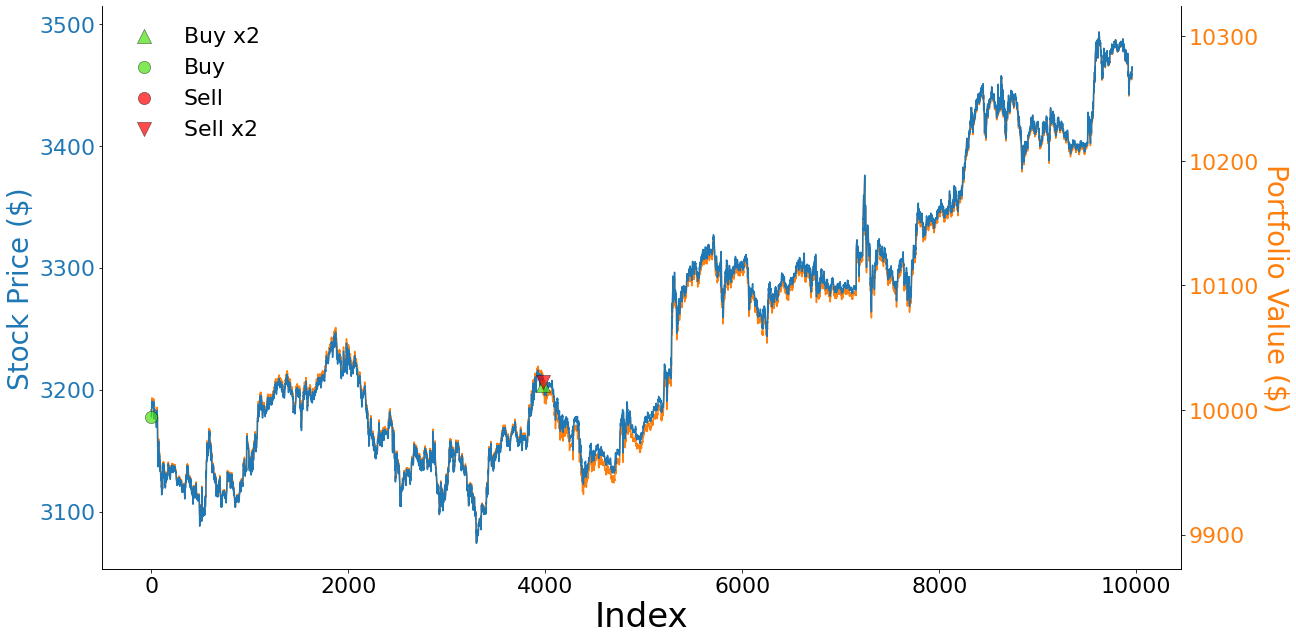

 12%|█▎        | 1/8 [02:03<14:22, 123.22s/it]

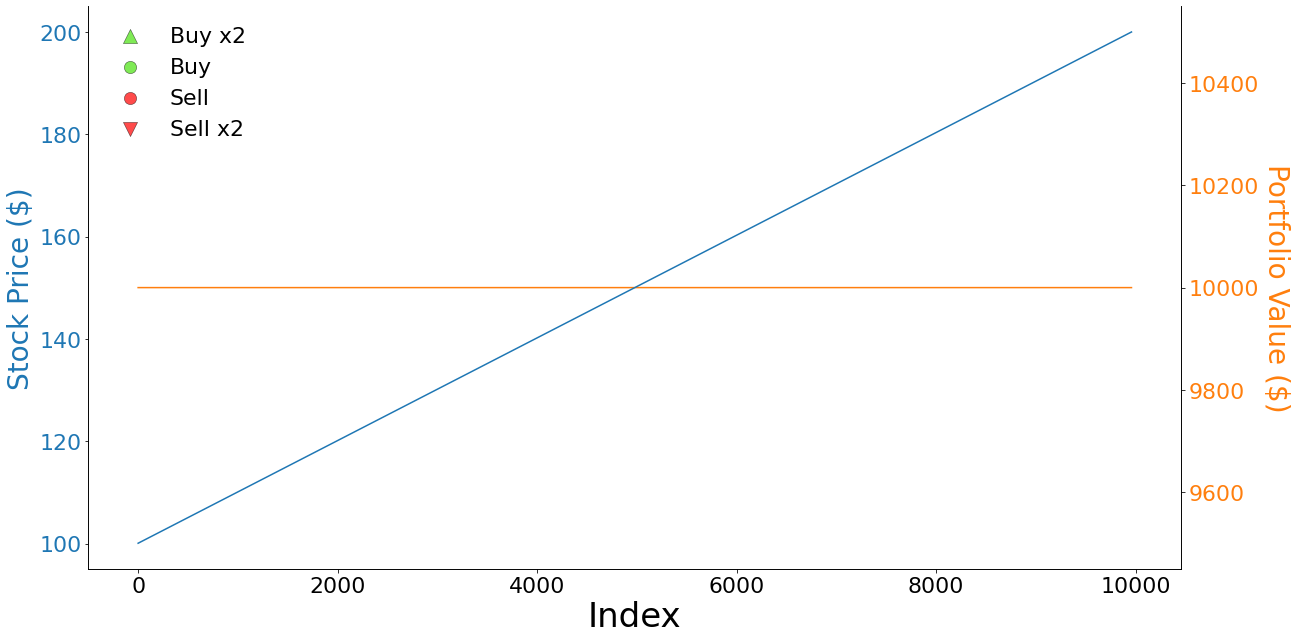

 25%|██▌       | 2/8 [21:00<42:43, 427.33s/it]

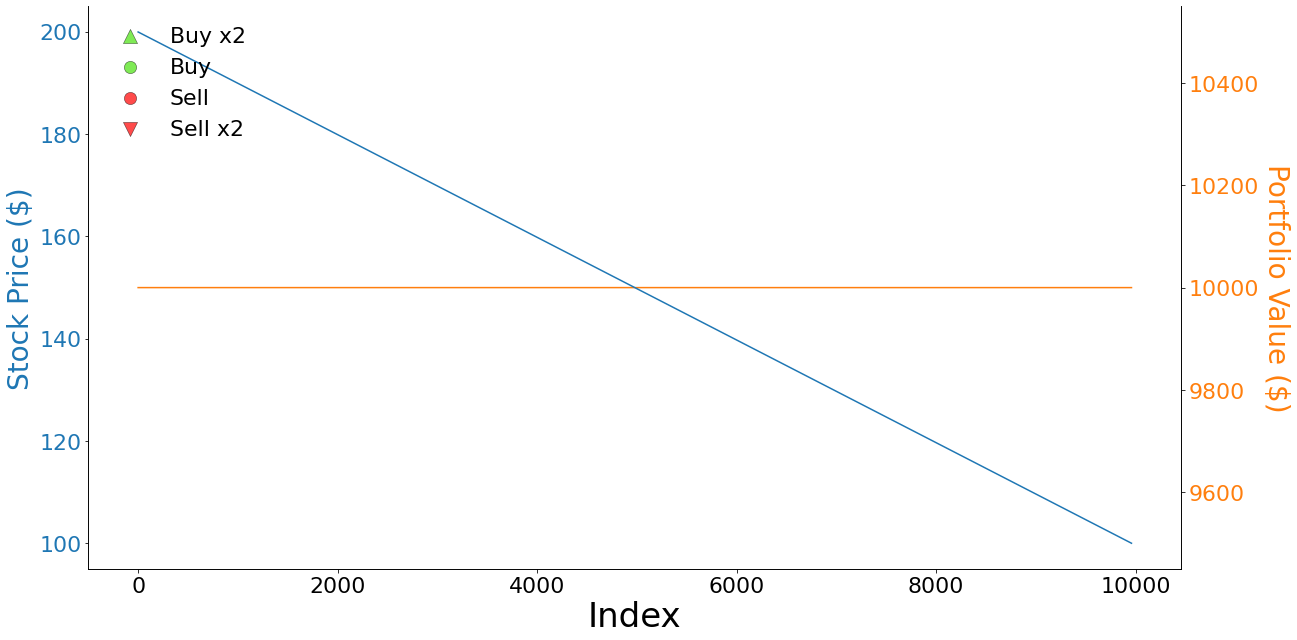

 38%|███▊      | 3/8 [23:12<28:13, 338.75s/it]

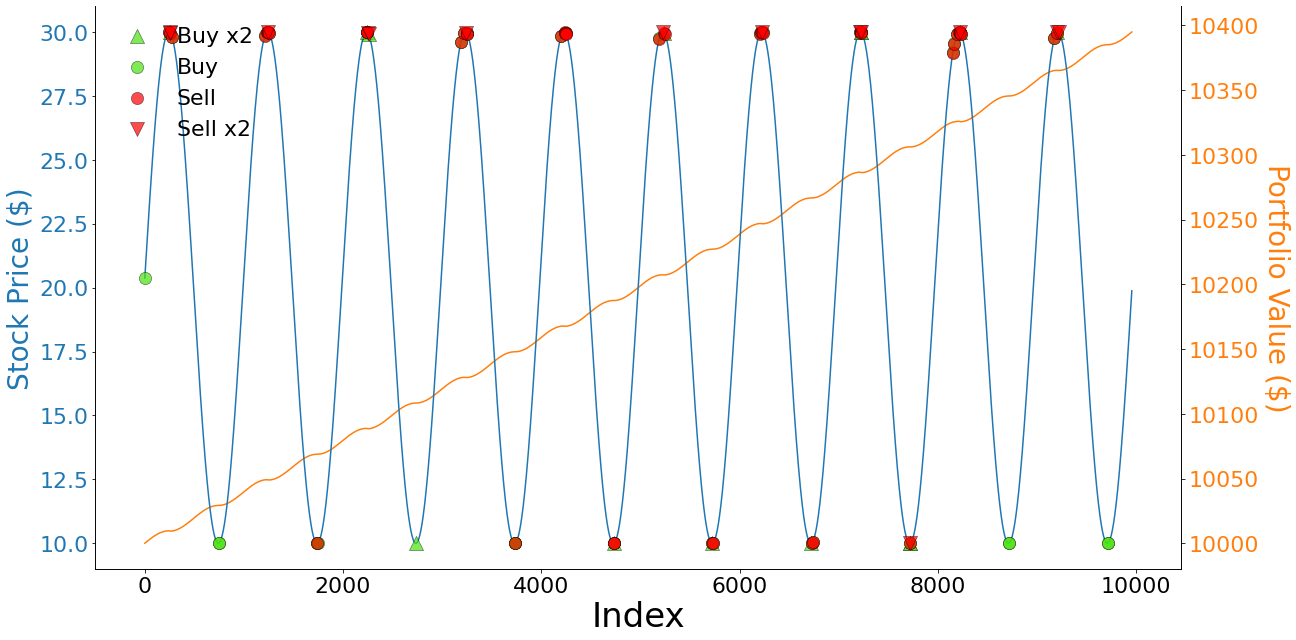

 50%|█████     | 4/8 [25:17<18:19, 274.83s/it]

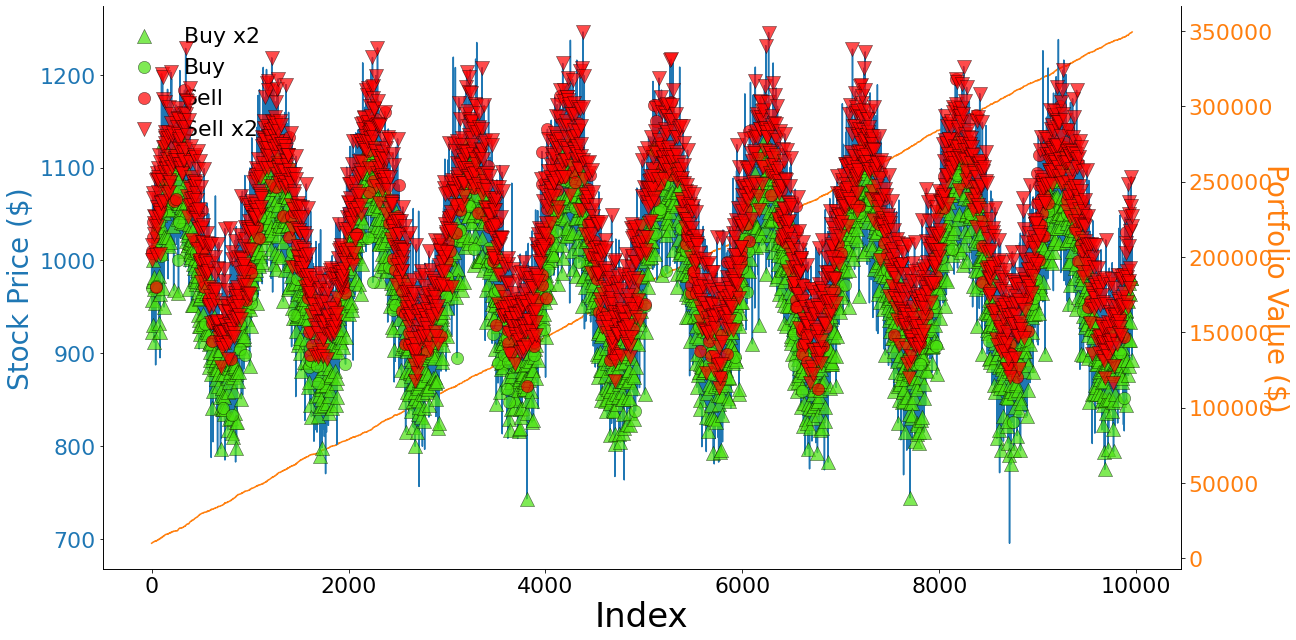

 62%|██████▎   | 5/8 [27:30<11:36, 232.12s/it]

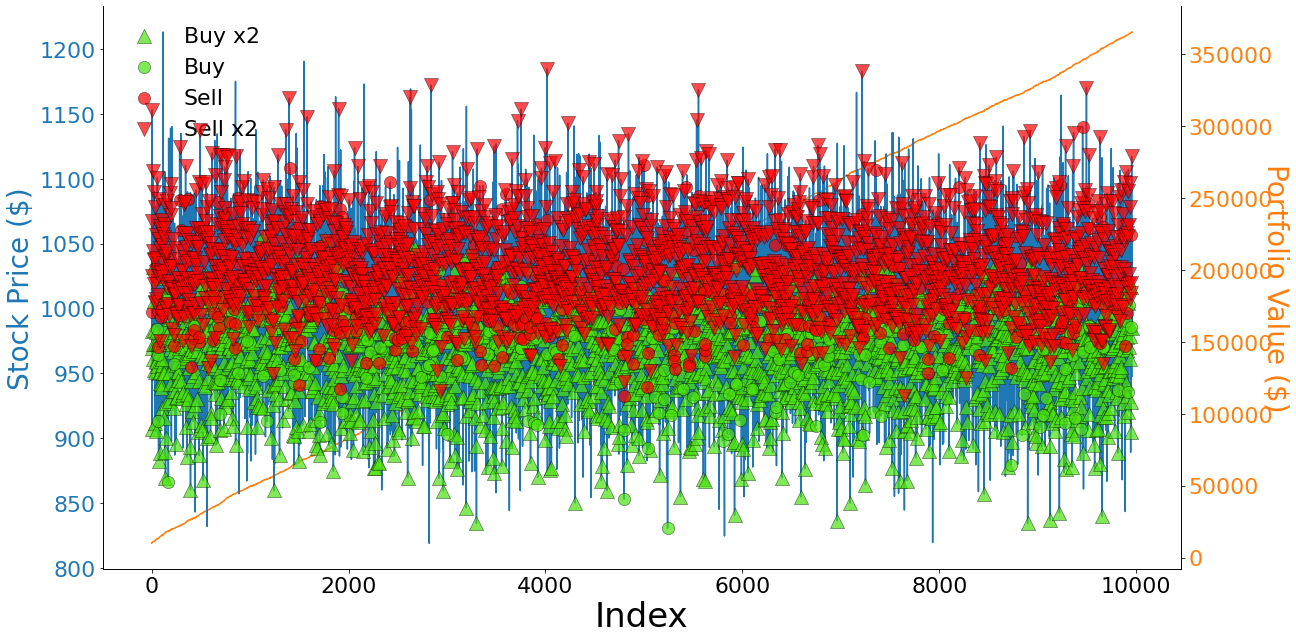

 75%|███████▌  | 6/8 [29:40<06:42, 201.40s/it]

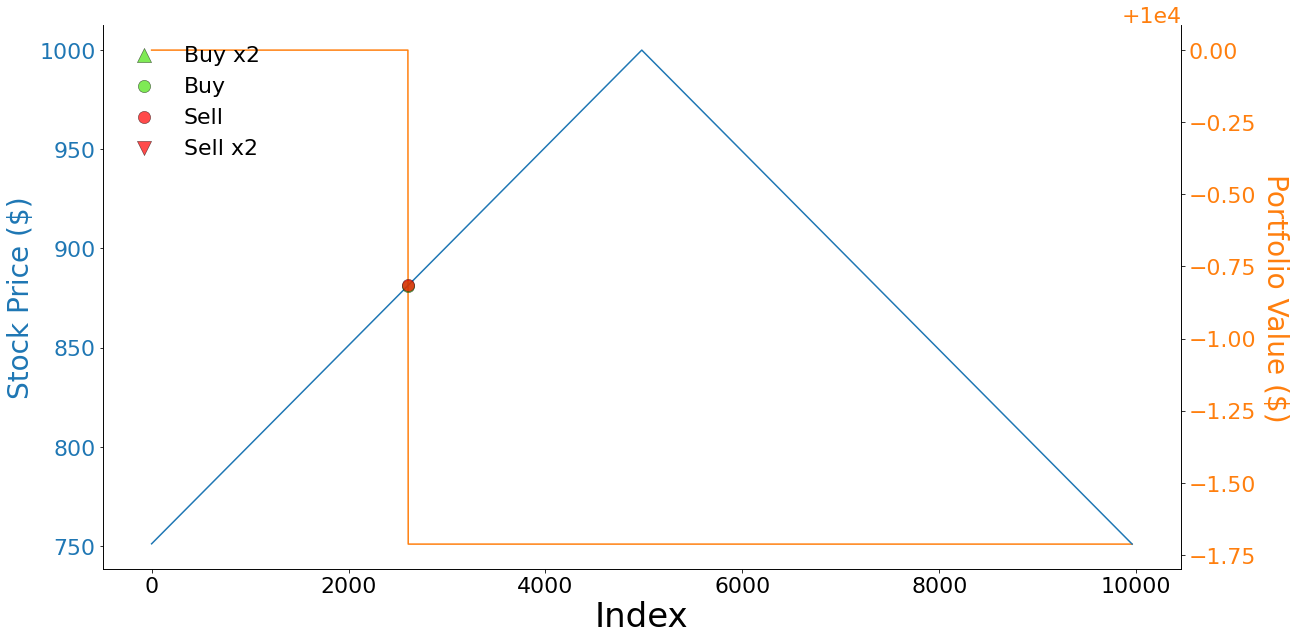

 88%|████████▊ | 7/8 [31:43<02:57, 177.95s/it]

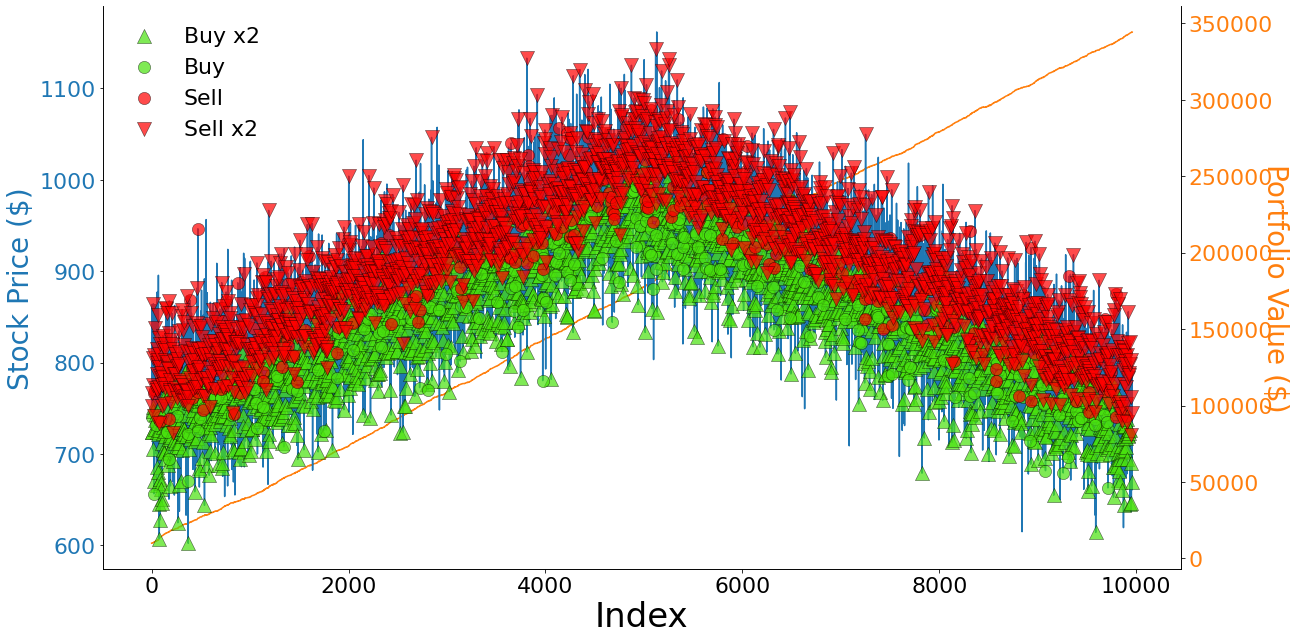

100%|██████████| 8/8 [33:53<00:00, 254.21s/it]


In [23]:
N_TIME_STEP = 250000


# TODO: Construct the environment
for env in tqdm(envs):
    env.reset()
    model = A2C(MlpPolicy, env, verbose=0)
    model.learn(total_timesteps=N_TIME_STEP)

    state = env.reset()
    portfolio_values = []
    prices = []
    actions = []
    
    for i in range(10_000):
        action, _ = model.predict(state)

        price, portfolio_value = env.get_data()
        actions.append(action)
        prices.append(price)
        portfolio_values.append(portfolio_value)

        state, reward, done, _ = env.step(action)
        if done:
            break
    plot(prices, actions, portfolio_values, right_y_adjust=1.1)



# Hyperparameter tuning with Wandb